<h1 style="text-align: center;"> University of 20 août 1955 - Skikda </h1>
<h2 style="text-align: center;"> Faculty of Sciences - Department of Computer Science </h2>
<h2 style="text-align: center;"> M2 AI - AIS -  </h2>
<h2 style="text-align: center;"> Biad Seifeddine </h2>

In [3]:
import numpy as np 
import pandas as pd

In [ ]:
iter= 10
size=10
min_distance = 2
solutions_number= 5
mutation_range= [-0.5,0.5]

In [46]:
population= np.random.uniform(low=-10,high=10,size=(size,2))

In [56]:
print(population)

[[-9.68829688  0.98243737]
 [ 0.06451606 -0.52176603]
 [-5.1022582   9.97738468]
 [-5.69118493 -6.51378111]
 [-6.38540324 -5.50513225]
 [ 9.57498702  0.33881909]
 [ 8.2653217   0.07510074]
 [ 7.40145772  3.40932524]
 [ 7.72139123 -9.54628569]
 [ 5.92995876 -8.86340083]]


In [58]:
print(population[0][1])

0.982437374213756


In [104]:
def fitness_evaluation(x,y):
    return x**2+y**2

In [1]:
import numpy as np

# Objective function to minimize (customize as needed)
def objective_function(solution):
    return np.sum(solution**2)  # Example: sum of squares

# Initialize population
def initialize_population(size, dimensions, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (size, dimensions))

# Calculate distances between solutions
def calculate_distances(population):
    distances = np.zeros((len(population), len(population)))
    for i in range(len(population)):
        for j in range(i + 1, len(population)):
            distances[i, j] = np.linalg.norm(population[i] - population[j])
            distances[j, i] = distances[i, j]
    return distances

# Filter based on minimum distance
def filter_by_min_distance(population, min_distance):
    distances = calculate_distances(population)
    selected_indices = []
    for i in range(len(population)):
        if all(distances[i][j] >= min_distance for j in selected_indices):
            selected_indices.append(i)
    return population[selected_indices]

# Clone and mutate solutions
def clone_and_mutate(solution, mutation_range):
    mutation = np.random.uniform(mutation_range[0], mutation_range[1], size=solution.shape)
    return solution + mutation

# AIS algorithm
def artificial_immune_system(iterations, size, min_distance, solutions_number, mutation_range, dimensions, bounds):
    lower_bound, upper_bound = bounds
    population = initialize_population(size, dimensions, lower_bound, upper_bound)
    best_solutions = []
    
    for iteration in range(iterations):
        # Evaluate fitness
        fitness = np.array([objective_function(sol) for sol in population])
        
        # Select best solutions
        sorted_indices = np.argsort(fitness)
        population = population[sorted_indices[:solutions_number]]
        
        # Filter solutions by minimum distance
        population = filter_by_min_distance(population, min_distance)
        
        # Clone and mutate solutions
        new_population = []
        for solution in population:
            for _ in range(size // len(population)):  # Ensure total population size remains constant
                new_population.append(clone_and_mutate(solution, mutation_range))
        
        # Evaluate new population
        population = np.array(new_population[:size])  # Keep only the required number of solutions
        
        # Update best solutions
        best_solutions.append(population[np.argmin([objective_function(sol) for sol in population])])
        
        # Log the best solution of the generation
        print(f"Iteration {iteration + 1}: Best Solution = {best_solutions[-1]}, Fitness = {objective_function(best_solutions[-1])}")
    
    # Return the overall best solution
    overall_best_solution = min(best_solutions, key=objective_function)
    return overall_best_solution, objective_function(overall_best_solution)

# Parameters
iterations = 10
size = 10
min_distance = 2
solutions_number = 5
mutation_range = [-0.5, 0.5]
dimensions = 3
bounds = (-10, 10)

# Run AIS
best_solution, best_fitness = artificial_immune_system(iterations, size, min_distance, solutions_number, 
                                                       mutation_range, dimensions, bounds)
print("\nOverall Best Solution:", best_solution)
print("Overall Best Fitness:", best_fitness)


Iteration 1: Best Solution = [-4.88343297  4.50597558 -1.87910322], Fitness = 47.682762375869125
Iteration 2: Best Solution = [-4.81110165  4.12703858 -1.73565555], Fitness = 43.19164668911574
Iteration 3: Best Solution = [-4.72374673  3.67505772 -1.24054712], Fitness = 37.358789629501004
Iteration 4: Best Solution = [-4.25060603  3.63038419 -1.70973138], Fitness = 34.170522356508755
Iteration 5: Best Solution = [-3.78726241  3.34853045 -1.86596324], Fitness = 29.037831536423184
Iteration 6: Best Solution = [-3.57737737  3.06018467 -2.27271679], Fitness = 27.32760065854307
Iteration 7: Best Solution = [-3.19175419  2.90803992 -2.09312459], Fitness = 23.025161515493878
Iteration 8: Best Solution = [-2.79736516  2.5254128  -1.73850479], Fitness = 17.22536058973547
Iteration 9: Best Solution = [-2.38336645  2.66261594 -1.49421709], Fitness = 15.002643965266648
Iteration 10: Best Solution = [-1.89051312  2.19549253 -1.06856061], Fitness = 9.536049063293396

Overall Best Solution: [-1.89051

C:\Windows\Temp\ipykernel_6360\559419088.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.linalg.norm(cities[route[i]] - cities[route[i+1]]) for i in range(-1, len(route)-1))


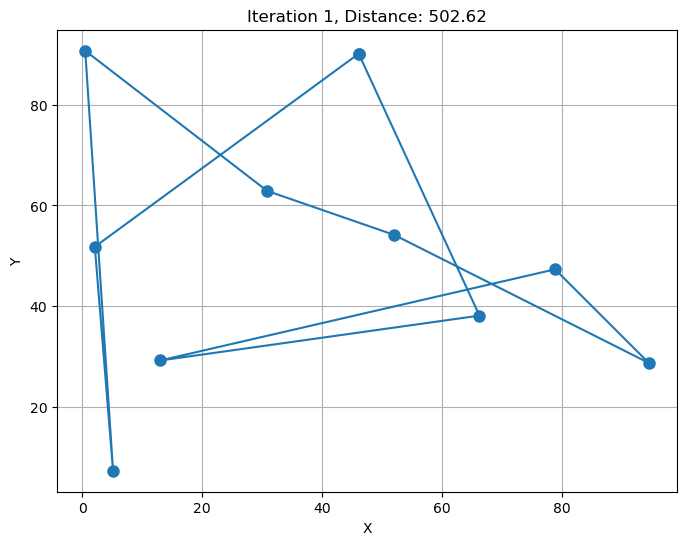

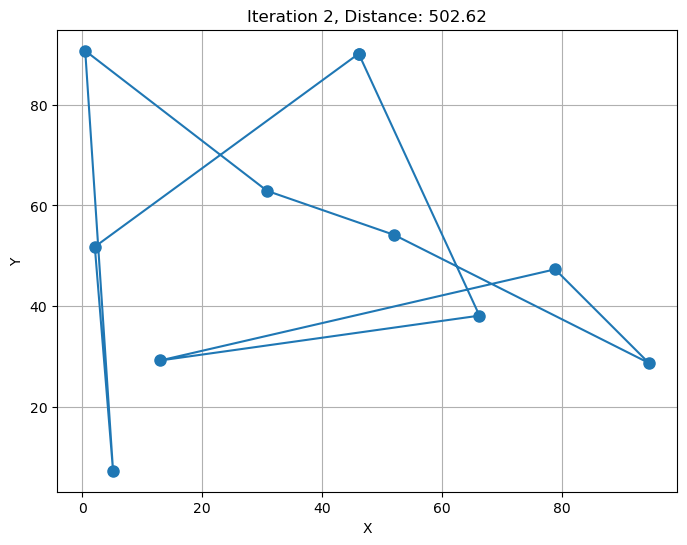

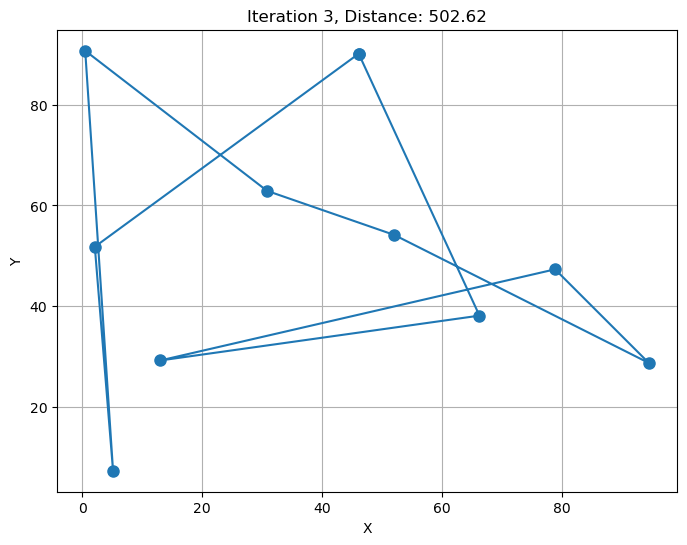

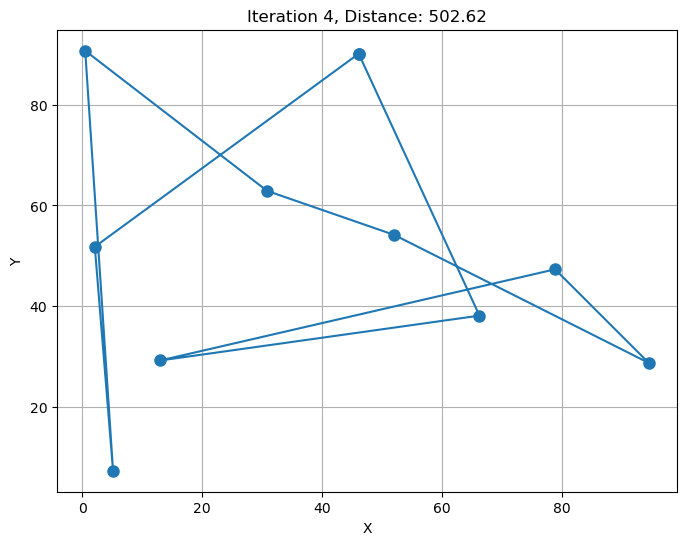

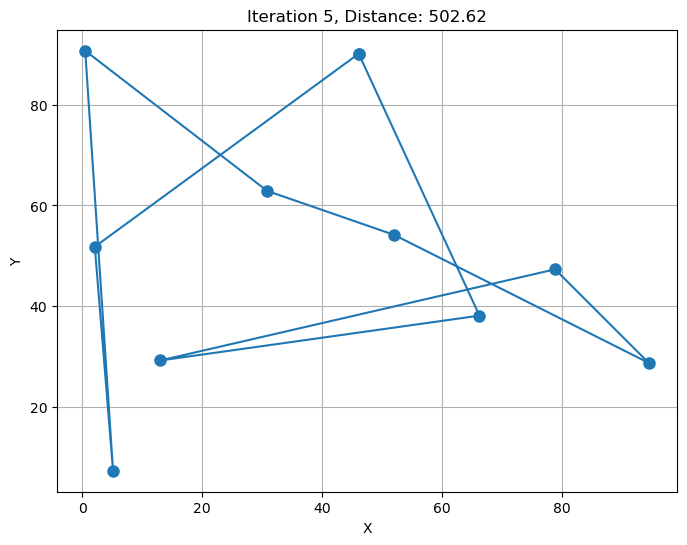

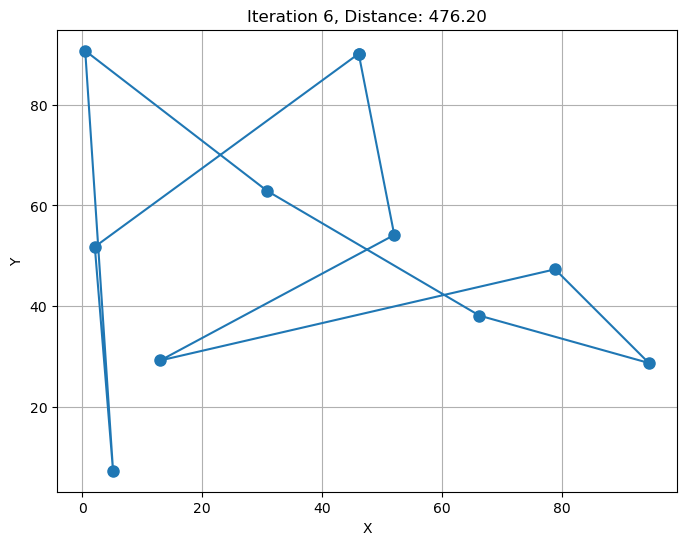

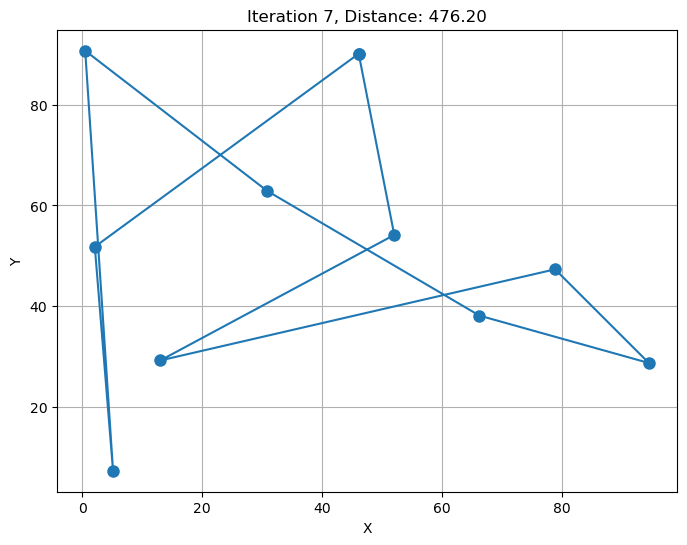

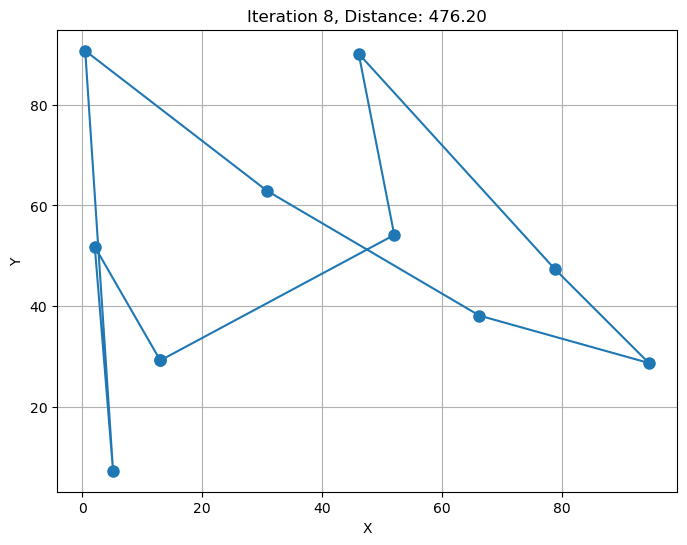

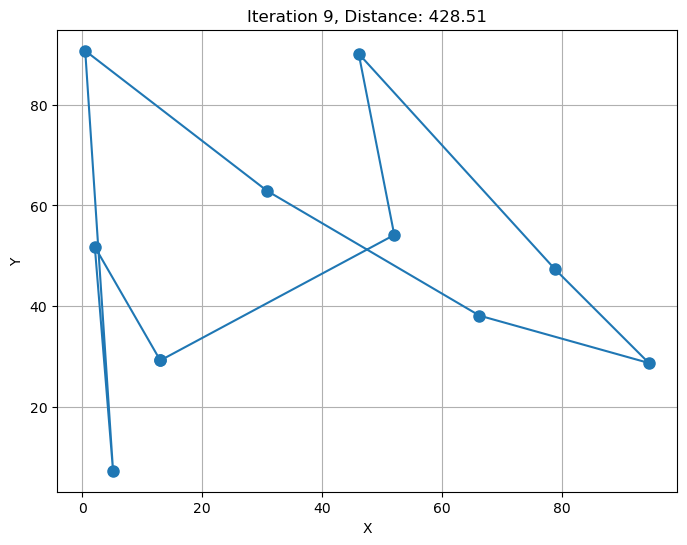

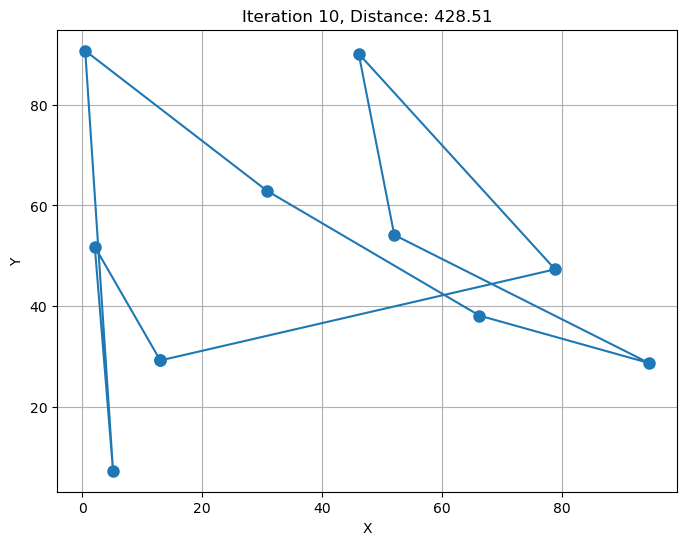


Best Route: [0 2 1 7 6 8 9 4 3 5]
Best Distance: 428.5051776437234


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random TSP cities
def generate_cities(num_cities, width, height):
    return np.random.rand(num_cities, 2) * [width, height]

# Calculate the total distance of a TSP route
def calculate_route_distance(route, cities):
    return np.sum(np.linalg.norm(cities[route[i]] - cities[route[i+1]]) for i in range(-1, len(route)-1))

# Initialize population of routes
def initialize_population(size, num_cities):
    return [np.random.permutation(num_cities) for _ in range(size)]

# Clone and mutate a route
def clone_and_mutate(route, mutation_range):
    route = route.copy()
    if np.random.rand() < mutation_range:
        i, j = np.random.choice(len(route), size=2, replace=False)
        route[i], route[j] = route[j], route[i]  # Swap two cities
    return route

# AIS Algorithm for TSP
def artificial_immune_system_tsp(cities, iterations, size, min_distance, solutions_number, mutation_rate):
    num_cities = len(cities)
    population = initialize_population(size, num_cities)
    best_routes = []
    best_distances = []

    for iteration in range(iterations):
        # Evaluate fitness (route distance)
        distances = np.array([calculate_route_distance(route, cities) for route in population])
        
        # Select the best solutions
        sorted_indices = np.argsort(distances)
        population = [population[i] for i in sorted_indices[:solutions_number]]
        distances = distances[sorted_indices[:solutions_number]]
        
        # Clone and mutate
        new_population = []
        for route in population:
            for _ in range(size // solutions_number):  # Ensure population size remains constant
                new_population.append(clone_and_mutate(route, mutation_rate))
        population = new_population[:size]
        
        # Update the best route and distance
        best_idx = np.argmin(distances)
        best_route = population[best_idx]
        best_distance = distances[best_idx]
        
        best_routes.append(best_route)
        best_distances.append(best_distance)

        # Visualization
        plt.figure(figsize=(8, 6))
        plot_route(cities, best_route, f"Iteration {iteration + 1}, Distance: {best_distance:.2f}")
    
    # Final results
    overall_best_route = best_routes[np.argmin(best_distances)]
    overall_best_distance = np.min(best_distances)
    return overall_best_route, overall_best_distance

# Helper function to plot a TSP route
def plot_route(cities, route, title):
    route_cities = cities[np.append(route, route[0])]  # Include the return to the start
    plt.plot(route_cities[:, 0], route_cities[:, 1], '-o', markersize=8)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Parameters
num_cities = 10
iterations = 10
size = 10
min_distance = 2  # Placeholder, not directly used in this version
solutions_number = 5
mutation_rate = 0.2  # Probability of mutation
width, height = 100, 100

# Generate cities and solve TSP
cities = generate_cities(num_cities, width, height)
best_route, best_distance = artificial_immune_system_tsp(cities, iterations, size, min_distance, solutions_number, mutation_rate)

print("\nBest Route:", best_route)
print("Best Distance:", best_distance)
